# TensorFlow Coreで多層パーセプトロン

参考資料

- https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/4_Utils/tensorboard_basic.ipynb

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# TensorFlowの読み込み
import tensorflow as tf

In [3]:
# graphs02ディレクトリがあったら削除
if tf.gfile.Exists('./graphs02'):
    tf.gfile.DeleteRecursively('./graphs02/')

In [4]:
# MNIST データセットの読み込み
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('../datasets/mnist/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ../datasets/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ../datasets/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../datasets/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../datasets/mnist/t10k-labels-idx1-ubyte.gz


In [5]:
print(mnist.train.images.shape)
print(mnist.validation.images.shape)
print(mnist.test.images.shape)

(55000, 784)
(5000, 784)
(10000, 784)


In [6]:
print(mnist.train.labels.shape)
print(mnist.validation.labels.shape)
print(mnist.test.labels.shape)

(55000, 10)
(5000, 10)
(10000, 10)


[7 3 4 6 1 8 1 0 9 8]


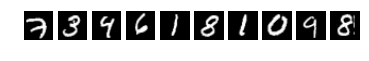

In [7]:
# 画像とラベルを確認
fig, ax = plt.subplots(1, 10)
for ii in range(10):
    ax[ii].imshow(mnist.train.images[ii].reshape([28, 28]), 'gray')
    ax[ii].axis('off')
    
print(np.argmax(mnist.train.labels[:10], axis=1))

In [8]:
# ハイパーパラメータ
learning_rate = 0.01
training_epochs = 150
batch_size = 100
display_step = 1  # エポック
logdir = './graphs02'

In [9]:
x = tf.placeholder(tf.float32, [None, 784], name='InputData')

In [10]:
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

In [11]:
# パラメータ
W = tf.Variable(tf.zeros([784, 10]), name='Weights')
b =  tf.Variable(tf.zeros([10]), name='Bias')

TensorBoardでみやすくなるようスコープに入れていく

In [12]:
# Model
#with tf.name_scope('Model'):
logit = tf.matmul(x, W) + b
pred = tf.nn.softmax(logit)

#with tf.name_scope('Loss'):
# 数値的に不安定な実装なので要注意
loss = tf.reduce_mean(- tf.reduce_sum(y * tf.log(pred), reduction_indices=1))
# 数値的に安定な実装
#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logit))

#with tf.name_scope('SGD'):
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

#with tf.name_scope('Accuracy'):
accuracy = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(accuracy, tf.float32))

In [13]:
# 変数の初期化
init = tf.global_variables_initializer()

In [14]:
tf.summary.scalar('loss', loss)
tf.summary.scalar('accuracy', accuracy)
summary_op = tf.summary.merge_all()

tensorboardを立ち上げるには以下のコードを打つ

```
tensorboard --logdir='./graphs02' --port=6006
```

In [15]:
with tf.Session() as sess:
    sess.run(init)
    
    # ログのTensorBoardへの書き出し
    summary_writer = tf.summary.FileWriter(logdir, graph=tf.get_default_graph())
    
    #　学習
    for epoch in range(training_epochs):
        
        average_loss = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            
            # ミニバッチを取得
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # 計算グラフを実行
            _, loss_value, summary = sess.run([train_op, loss, summary_op],
                                             feed_dict={x: batch_xs, y: batch_ys})
            
            #  ステップごとにログを書き出す
            summary_writer.add_summary(summary, epoch * total_batch + i)
            
            # 平均損失を計算
            average_loss += loss_value / total_batch
            
        # エポックの平均損失を時々表示
        if (epoch + 1) % display_step == 0:
            print("Epoch: %04d\tloss=%.9f" % (epoch+1, average_loss))

Epoch: 0001	loss=1.183409788
Epoch: 0002	loss=0.664995495
Epoch: 0003	loss=0.552615560
Epoch: 0004	loss=0.498578957
Epoch: 0005	loss=0.465489370
Epoch: 0006	loss=0.442536707
Epoch: 0007	loss=0.425493833
Epoch: 0008	loss=0.412156212
Epoch: 0009	loss=0.401333432
Epoch: 0010	loss=0.392394326
Epoch: 0011	loss=0.384756775
Epoch: 0012	loss=0.378210272
Epoch: 0013	loss=0.372383532
Epoch: 0014	loss=0.367303779
Epoch: 0015	loss=0.362699974
Epoch: 0016	loss=0.358551035
Epoch: 0017	loss=0.354876478
Epoch: 0018	loss=0.351449799
Epoch: 0019	loss=0.348308506
Epoch: 0020	loss=0.345436832
Epoch: 0021	loss=0.342737799
Epoch: 0022	loss=0.340235049
Epoch: 0023	loss=0.337912788
Epoch: 0024	loss=0.335688573
Epoch: 0025	loss=0.333609294
Epoch: 0026	loss=0.331787237
Epoch: 0027	loss=0.329947388
Epoch: 0028	loss=0.328229609
Epoch: 0029	loss=0.326601887
Epoch: 0030	loss=0.325061481
Epoch: 0031	loss=0.323592124
Epoch: 0032	loss=0.322125017
Epoch: 0033	loss=0.320808485
Epoch: 0034	loss=0.319512220
Epoch: 0035	lo